# DATA PROCESSING
### This file focus on exploratory data analysis and analytic visualisation
### we aim to find the variables which will help us predict the loan amount and loan status(i.e approve/reject)

#
## Exploratory Data Analysis

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset = pd.read_csv("loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
dataset[" loan_status"].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

## Analytic Visualisation

#### we try to find the variable which correlate the most with loan status and loan amount using a heatmap

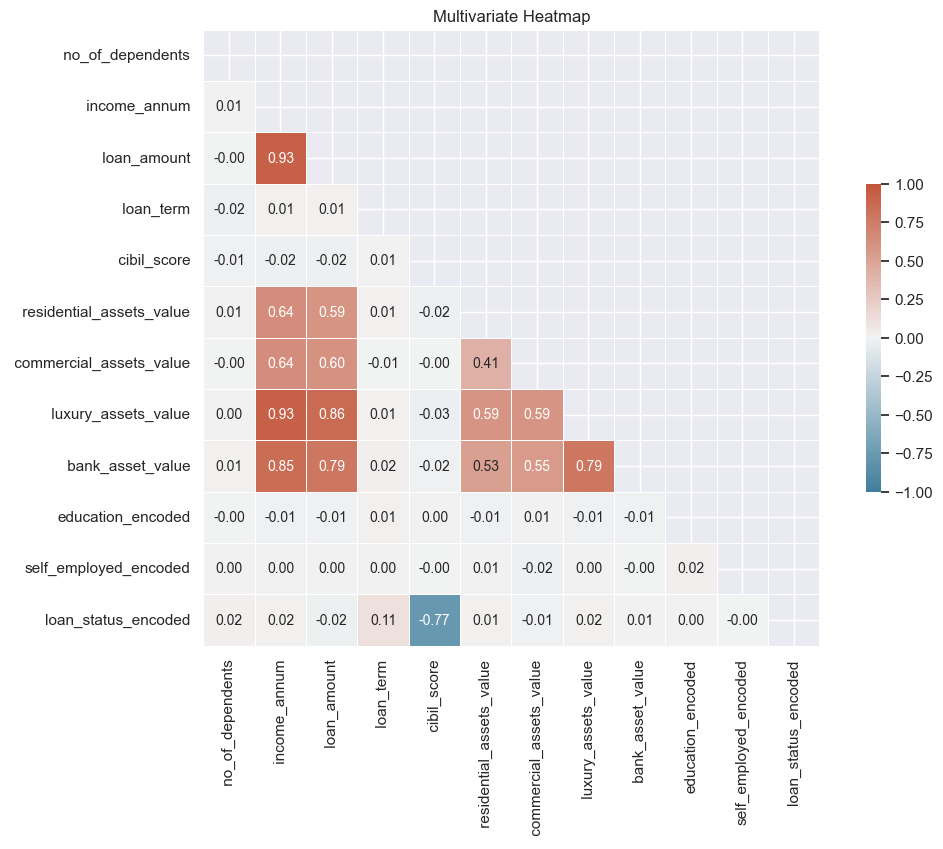

In [6]:
df = dataset.copy()

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df[' education'])
df['self_employed_encoded'] = label_encoder.fit_transform(df[' self_employed'])
df['loan_status_encoded'] = label_encoder.fit_transform(df[' loan_status'])

# Drop non-encoded and non-numeric columns
df_numeric = df.drop(['loan_id', ' education', ' self_employed', ' loan_status'], axis=1)

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10},
            vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Multivariate Heatmap')
plt.show()

### We notice the following:
* loan_amount v income_annum            0.93    ✅
* loan_amount v luxury_assets_value     0.86    ✅
* loan amount v bank_assets_value       0.79    ✅
* loan amount v commercial_assets_value 0.60
* loan amount v residential_assets_value0.59

* loan_status v cibil_score            -0.77    ✅
* loan status v loan_term               0.11

### Variables below have little to no correlation hence can be cleared:
* number of dependents
* self_employed
* loan id

In [7]:
dataset.drop(columns = [" self_employed"," no_of_dependents","loan_id"])

,education,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,Graduate,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,Not Graduate,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,Graduate,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,Graduate,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,Not Graduate,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...
4264,Graduate,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,Not Graduate,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,Not Graduate,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,Not Graduate,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Now we try to visualise the data (analytic visualisation)

#### we expand on the correlation of loan amount against:
* income_annum
* luxury_assets_value
* bank_assets_value
* commercial_assets_value 
* residential_assets_value

### Using a scatter plot since all of them are numerical values

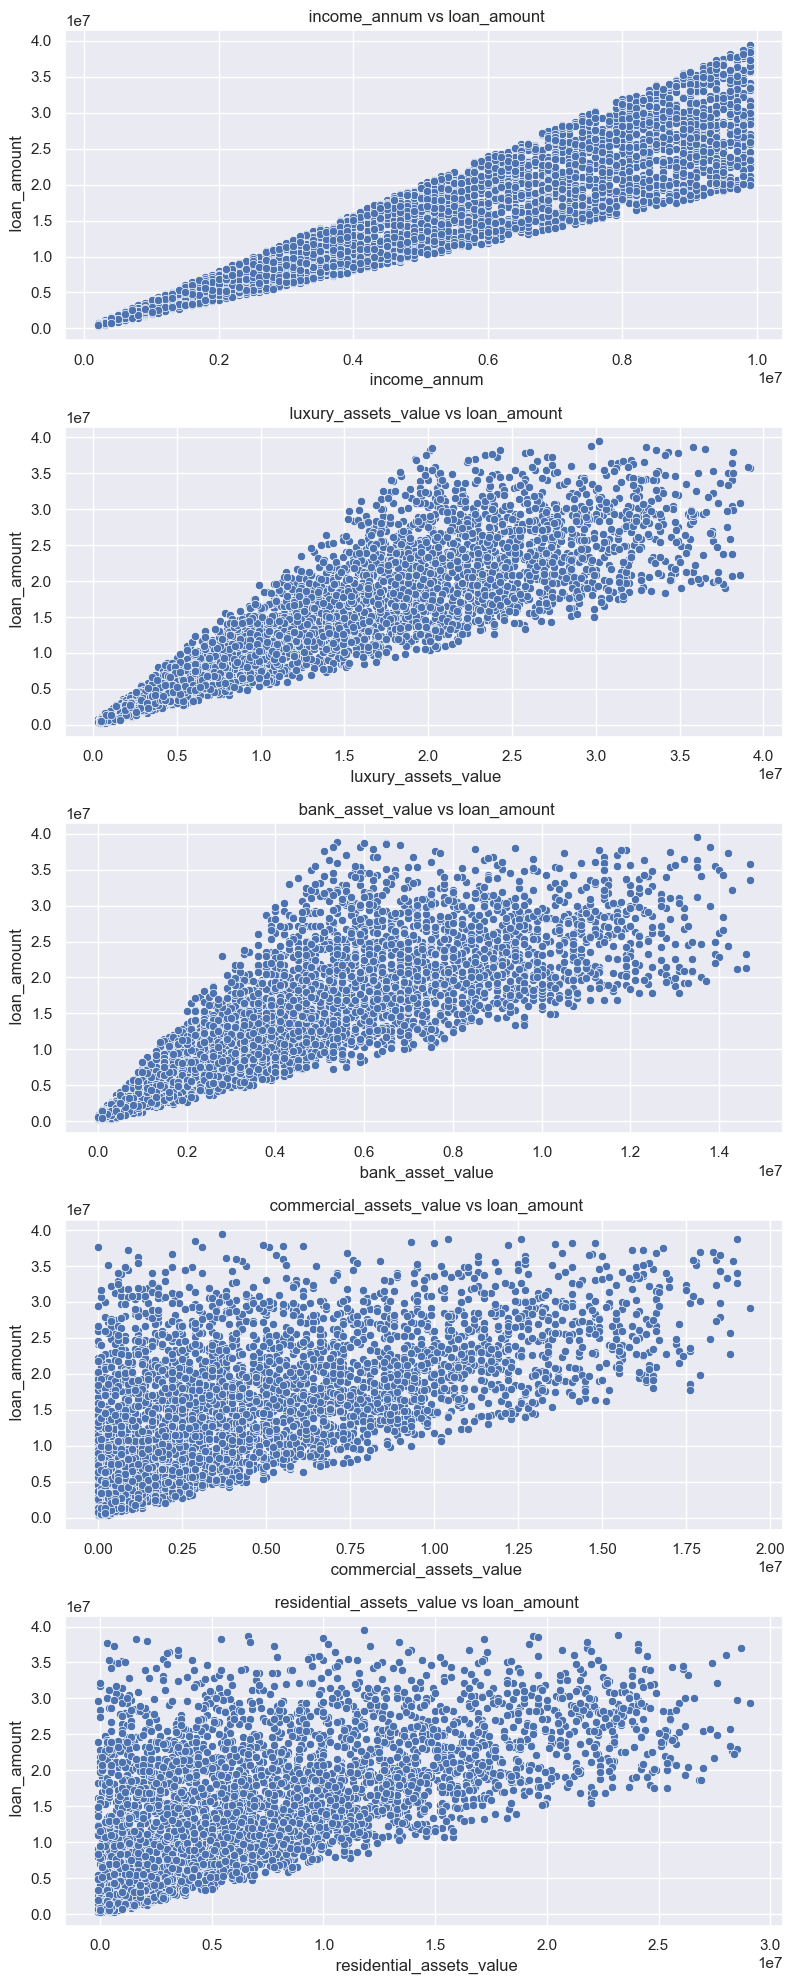

In [8]:
#initialise a list to store the variables
x_variables = [' income_annum',' luxury_assets_value',' bank_asset_value',' commercial_assets_value',' residential_assets_value']
# Generate scatterplots
fig, axs = plt.subplots(len(x_variables), 1, figsize=(8, len(x_variables) * 4))
for i, x in enumerate(x_variables):
    sb.scatterplot(data=dataset, x=x, y=' loan_amount', ax=axs[i])
    axs[i].set_title(f"{x} vs loan_amount")
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(' loan_amount')

# Adjust layout
plt.tight_layout()
plt.show()

### As seen from the scatterplot, income_annum,bank_asset_value and luxury_assets_value is more correlated with lesser variance compared to the other variables. Hence they will be used for linear regression model later

#### Now we expand on the correlation of loan status against:
* cibil_score
* loan_term
### Using a box plot and swarm diagram

Text(0.5, 1.0, 'loan_status vs loan_term')

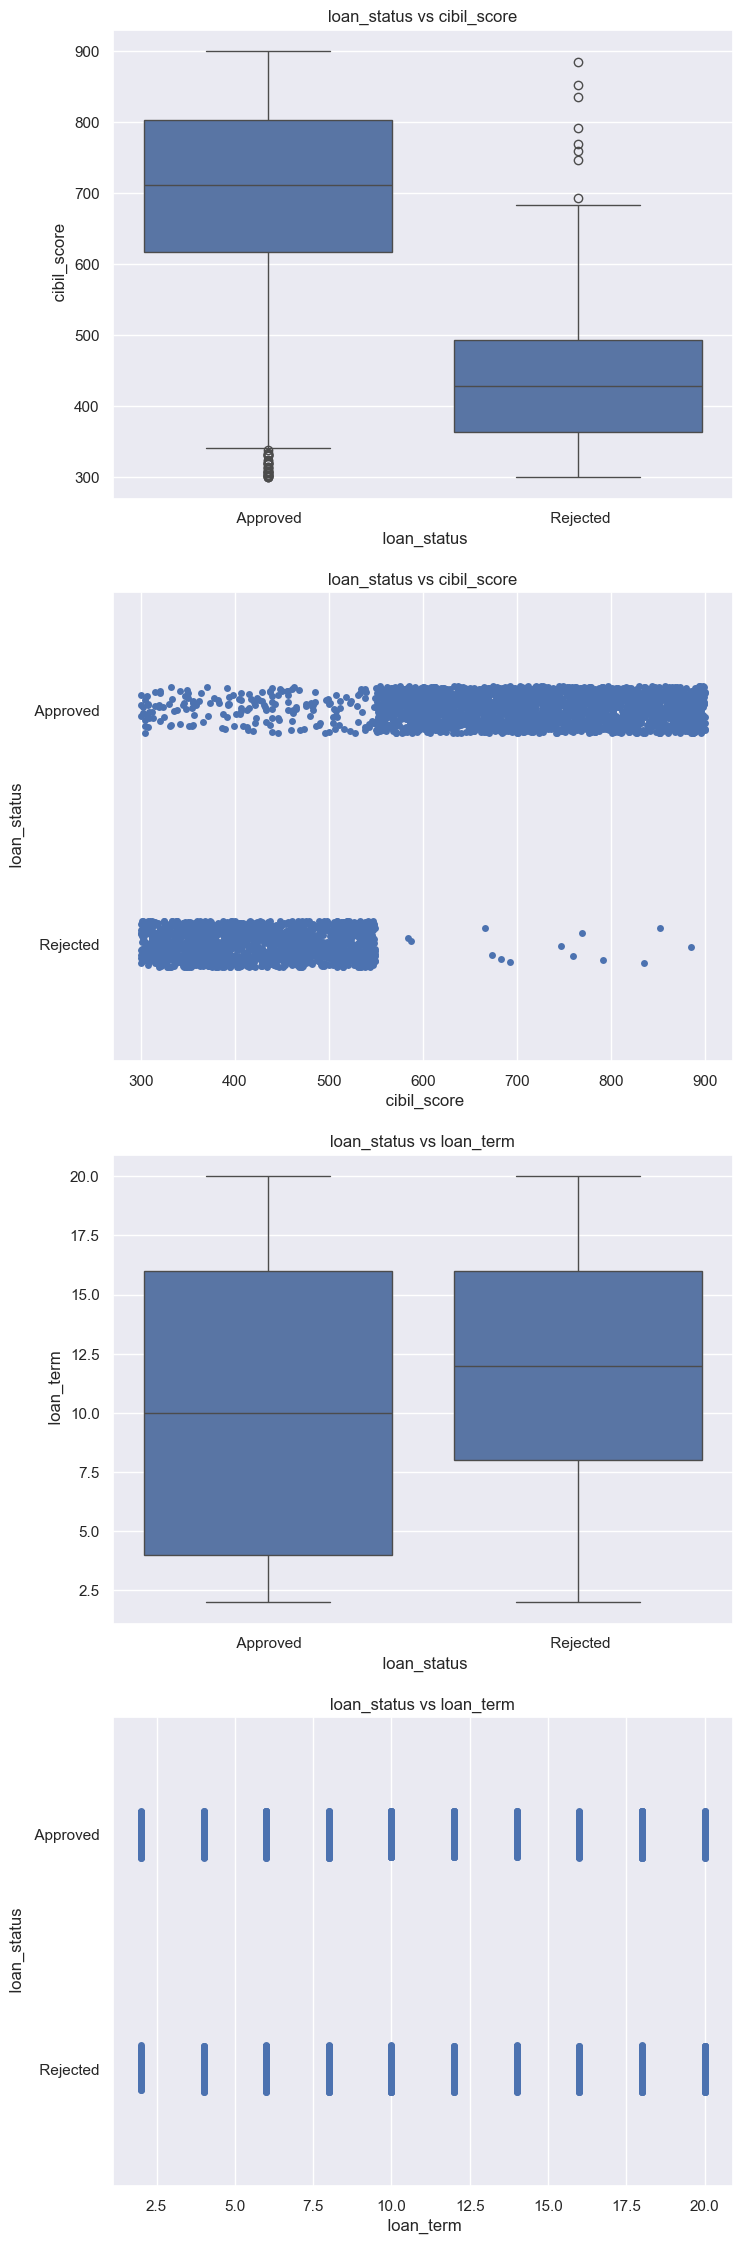

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(8, 4 * 7))

sb.boxplot(data=dataset,x=' loan_status',y=' cibil_score',ax=axs[0])
sb.stripplot(x = " cibil_score", y = " loan_status", data = dataset,ax=axs[1])
axs[0].set_title("loan_status vs cibil_score")
axs[1].set_title("loan_status vs cibil_score")
sb.boxplot(data=dataset,x=' loan_status',y=' loan_term',ax=axs[2])
sb.stripplot(x = " loan_term", y = " loan_status", data = dataset,ax=axs[3])
axs[2].set_title("loan_status vs loan_term")
axs[3].set_title("loan_status vs loan_term")


#### As seen on the diagram, cibil_score has a very high correlation with loan_status, seeing a pattern of higher chance of approval with higher cibil_score while loan_term does not show clear correlation. cibil_score will be used as a main variable for predicting loan approval rate